In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import missingno as ms
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Set max columns/rows 
pd.set_option('display.max_rows', 74)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv("fifa19.csv",header = 'infer')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.00,4.00,4.00,Medium/ Medium,Messi,Yes,RF,10.00,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.00,4.00,5.00,High/ Low,C. Ronaldo,Yes,ST,7.00,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.00,5.00,5.00,High/ Medium,Neymar,Yes,LW,10.00,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.00,3.00,1.00,Medium/ Medium,Lean,Yes,GK,1.00,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.00,5.00,4.00,High/ High,Normal,Yes,RCM,7.00,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,€196.4M


In [4]:
#Drop Duplicates
data.drop_duplicates(inplace=True)

In [5]:
#Get Overview of the types of data
data.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [6]:
#Drop Unwanted Columns that cannot be used for predictions:
data.drop(columns=['Unnamed: 0','Photo','Flag','Club Logo','Body Type','Real Face','Jersey Number',
                   'Joined','Loaned From','Contract Valid Until'],inplace = True)


In [7]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.00,18207.00,18207.00,18207.00,18207.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00
mean,214298.34,25.12,66.24,71.31,1597.81,1.11,2.95,2.36,49.73,45.55,52.30,58.69,42.91,55.37,47.17,42.86,52.71,58.37,64.61,64.73,63.50,61.84,63.97,55.46,65.09,63.22,65.31,47.11,55.87,46.70,49.96,53.40,48.55,58.65,47.28,47.70,45.66,16.62,16.39,16.23,16.39,16.71
std,29965.24,4.67,6.91,6.14,272.59,0.39,0.66,0.76,18.36,19.53,17.38,14.70,17.69,18.91,18.40,17.48,15.33,16.69,14.93,14.65,14.77,9.01,14.14,17.24,11.82,15.89,12.56,19.26,17.37,20.70,19.53,14.15,15.70,11.44,19.90,21.66,21.29,17.70,16.91,16.50,17.03,17.96
min,16.00,16.00,46.00,48.00,731.00,1.00,1.00,1.00,5.00,2.00,4.00,7.00,4.00,4.00,6.00,3.00,9.00,5.00,12.00,12.00,14.00,21.00,16.00,2.00,15.00,12.00,17.00,3.00,11.00,3.00,2.00,10.00,5.00,3.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00
25%,200315.50,21.00,62.00,67.00,1457.00,1.00,3.00,2.00,38.00,30.00,44.00,54.00,30.00,49.00,34.00,31.00,43.00,54.00,57.00,57.00,55.00,56.00,56.00,45.00,58.00,56.00,58.00,33.00,44.00,26.00,38.00,44.00,39.00,51.00,30.00,27.00,24.00,8.00,8.00,8.00,8.00,8.00
50%,221759.00,25.00,66.00,71.00,1635.00,1.00,3.00,2.00,54.00,49.00,56.00,62.00,44.00,61.00,48.00,41.00,56.00,63.00,67.00,67.00,66.00,62.00,66.00,59.00,66.00,66.00,67.00,51.00,59.00,52.00,55.00,55.00,49.00,60.00,53.00,55.00,52.00,11.00,11.00,11.00,11.00,11.00
75%,236529.50,28.00,71.00,75.00,1787.00,1.00,3.00,3.00,64.00,62.00,64.00,68.00,57.00,68.00,62.00,57.00,64.00,69.00,75.00,75.00,74.00,68.00,74.00,68.00,73.00,74.00,74.00,62.00,69.00,64.00,64.00,64.00,60.00,67.00,64.00,66.00,64.00,14.00,14.00,14.00,14.00,14.00
max,246620.00,45.00,94.00,95.00,2346.00,5.00,5.00,5.00,93.00,95.00,94.00,93.00,90.00,97.00,94.00,94.00,93.00,96.00,97.00,96.00,96.00,96.00,96.00,95.00,95.00,96.00,97.00,94.00,95.00,92.00,95.00,94.00,92.00,96.00,94.00,93.00,91.00,90.00,92.00,91.00,90.00,94.00


In [8]:
data.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                           object
LF                           object
CF                           object
RF                           object
RW                           object
LAM                          object
CAM                         

In [9]:
#Split Work Rate into attack and defend
data['Attack Work Rate'] = data['Work Rate'].str.split('/',expand=True)[0]
data['Defense Work Rate'] = data['Work Rate'].str.split('/',expand=True)[1]
#Drop 'Work Rate'
data.drop(columns = ['Work Rate'],inplace = True)

In [10]:
#Lets add features:
#Feature 'class' is a players overall binned into 3 classes: 0(Gold), 1(Silver), and 2(Bronze)
col = 'Overall'
condition = [data[col]>=80,(data[col]<80) & (data[col]>=70),data[col]<70]
values = [0,1,2]
data['class'] = np.select(condition,values,default = np.nan)

One Player only has 11 features, it seems the midd portions of the features are usually empty

In [11]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.00,4.00,4.00,RF,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,€226.5M,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.00,4.00,5.00,ST,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,€127.1M,High,Low,0.00
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.00,5.00,5.00,LW,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,€228.1M,High,Medium,0.00
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.00,3.00,1.00,GK,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,€138.6M,Medium,Medium,0.00
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.00,5.00,4.00,RCM,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,€196.4M,High,High,0.00


# Preprocessing

In [12]:
# All numeric columns seem important, Will encode a other columns that make sense

# Add player identifiers in a dictionary:
playerDict = {}
for i in range(0,len(data)):
    playerDict[str(data.ID[i])] = [data.Name[i],data.Club[i],data.Nationality[i],data.Position[i],data['Preferred Foot'][i]]

In [13]:
playerDict['193080']

['De Gea', 'Manchester United', 'Spain', 'GK', 'Right']

In [14]:
#Check the different annotations of money
valueSet = set()
for i in range(0,len(data)):
    valueSet.add(str(data['Release Clause'][i])[-1])
valueSet

{'K', 'M', 'n'}

In [15]:
# Fill Release Clause nulls with $0.0M
data['Release Clause'].fillna('$0.0M', inplace = True)

In [16]:
# Convert Monetary Values into Numerics:
data['Value'] = data['Value'].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000000 if "M" in str(x) else
                                  (float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000 if "K" in str(x) else 
                                  float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])))

data['Wage'] = data['Wage'].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000000 if "M" in str(x) else
                                  (float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000 if "K" in str(x) else 
                                  float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])))

data['Release Clause'] = data['Release Clause'].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000000 if "M" in str(x) else
                                  (float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])*1000 if "K" in str(x) else 
                                  float(re.findall(r"[-+]?\d*\.\d+|\d+",str(x))[0])))


In [17]:
#Check if Money is converted
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.00,565000.00,2202,Left,5.00,4.00,4.00,RF,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.00,290000.00,2143,Right,5.00,5.00,5.00,LW,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,0.00
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.00,260000.00,1471,Right,4.00,3.00,1.00,GK,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,0.00
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.00,355000.00,2281,Right,4.00,5.00,4.00,RCM,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,0.00


In [18]:
#Check if Money is converted for Thousands
data.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.00,1000.00,1307,Right,1.00,2.00,2.00,CM,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.00,38.00,40.00,49.00,25.00,42.00,30.00,34.00,45.00,43.00,54.00,57.00,60.00,49.00,76.00,43.00,55.00,40.00,47.00,38.00,46.00,46.00,39.00,52.00,43.00,45.00,40.00,48.00,47.00,10.00,13.00,7.00,8.00,9.00,143000.00,Medium,Medium,2.00
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.00,1000.00,1098,Right,1.00,2.00,2.00,ST,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.00,52.00,52.00,43.00,36.00,39.00,32.00,20.00,25.00,40.00,41.00,39.00,38.00,40.00,52.00,41.00,47.00,43.00,67.00,42.00,47.00,16.00,46.00,33.00,43.00,42.00,22.00,15.00,19.00,10.00,9.00,9.00,5.00,12.00,113000.00,Medium,Medium,2.00
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.00,1000.00,1189,Right,1.00,3.00,2.00,ST,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.00,40.00,46.00,38.00,38.00,45.00,38.00,27.00,28.00,44.00,70.00,69.00,50.00,47.00,58.00,45.00,60.00,55.00,32.00,45.00,32.00,15.00,48.00,43.00,55.00,41.00,32.00,13.00,11.00,6.00,5.00,10.00,6.00,13.00,165000.00,Medium,Medium,2.00
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.00,1000.00,1228,Right,1.00,3.00,2.00,RW,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,44.00,50.00,39.00,42.00,40.00,51.00,34.00,32.00,32.00,52.00,61.00,60.00,52.00,21.00,71.00,64.00,42.00,40.00,48.00,34.00,33.00,22.00,44.00,47.00,50.00,46.00,20.00,25.00,27.00,14.00,6.00,14.00,8.00,9.00,143000.00,Medium,Medium,2.00
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.00,1000.00,1321,Right,1.00,3.00,2.00,CM,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.00,34.00,46.00,48.00,30.00,43.00,40.00,34.00,44.00,51.00,57.00,55.00,55.00,51.00,63.00,43.00,62.00,47.00,60.00,32.00,56.00,42.00,34.00,49.00,33.00,43.00,40.00,43.00,50.00,10.00,15.00,9.00,12.00,9.00,165000.00,Medium,Medium,2.00


**Looks Better!**

In [19]:
data.shape

(18207, 81)

In [20]:
#Remove "lbs" from Weight
data['Weight'] = data['Weight'].apply(lambda x: str(x).replace("lbs",""))

In [21]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.00,565000.00,2202,Left,5.00,4.00,4.00,RF,5'7,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,6'2,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.00,290000.00,2143,Right,5.00,5.00,5.00,LW,5'9,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,0.00
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.00,260000.00,1471,Right,4.00,3.00,1.00,GK,6'4,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,0.00
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.00,355000.00,2281,Right,4.00,5.00,4.00,RCM,5'11,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,0.00


In [22]:
# Convert Height into cm for easier analysis
# First Fill nulls with the same format as split
data['Height'].fillna("0'0",inplace= True)
data['Height'] = data['Height'].str.split("'")

In [23]:
#Convert Height into cms
def get_cm(height):
    return int(height[0])*30.48 + int(height[1])*2.48
data['Height'] = data['Height'].apply(get_cm)

In [24]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.00,565000.00,2202,Left,5.00,4.00,4.00,RF,169.76,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,187.84,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.00,290000.00,2143,Right,5.00,5.00,5.00,LW,174.72,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,0.00
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.00,260000.00,1471,Right,4.00,3.00,1.00,GK,192.80,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,0.00
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.00,355000.00,2281,Right,4.00,5.00,4.00,RCM,179.68,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,0.00


# Nullity Analysis:

In [25]:
# Take subset of data that we want to analyze first:
# Columns that make sense for clustering:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Attack Work Rate', 'Defense Work Rate', 'class'],
  

In [26]:
#drop columns that are not needed:
subsetColumns = ['ID', 'Age', 'Overall', 'Potential',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Attack Work Rate', 'Defense Work Rate', 'class']

In [27]:
dataSubset = data[subsetColumns]

In [28]:
dataSubset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,31,94,94,110500000.00,565000.00,2202,Left,5.00,4.00,4.00,RF,169.76,159,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,33,94,94,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,187.84,183,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00
2,190871,26,92,93,118500000.00,290000.00,2143,Right,5.00,5.00,5.00,LW,174.72,150,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,0.00
3,193080,27,91,93,72000000.00,260000.00,1471,Right,4.00,3.00,1.00,GK,192.80,168,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,0.00
4,192985,27,91,92,102000000.00,355000.00,2281,Right,4.00,5.00,4.00,RCM,179.68,154,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,0.00


In [29]:
dataSubset.shape

(18207, 52)

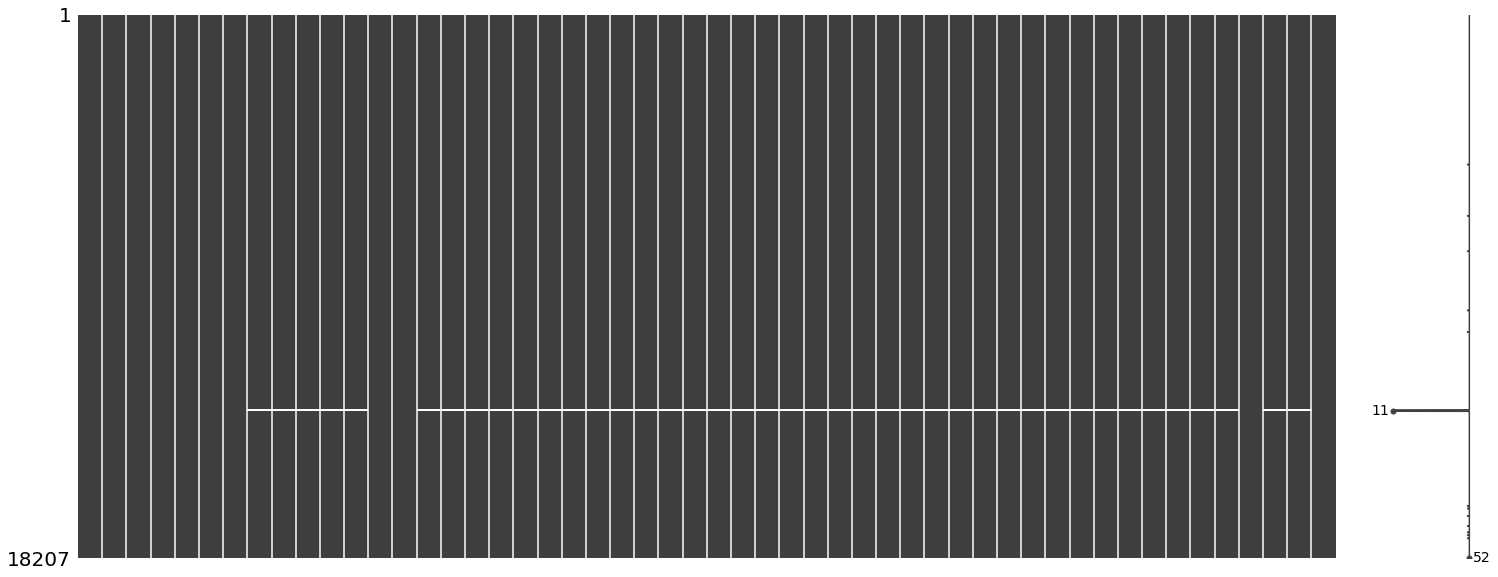

In [30]:
#Check the nullity of the dataframe
ms.matrix(dataSubset)

In [31]:
print(dataSubset.isna().sum())

ID                           0
Age                          0
Overall                      0
Potential                    0
Value                        0
Wage                         0
Special                      0
Preferred Foot              48
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Position                    60
Height                       0
Weight                       0
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength

In [32]:
dataSubset[dataSubset['Position'].isna()]

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
5018,153160,37,70,70,0.00,0.00,1574,Right,1.00,3.00,2.00,NaN,179.68,172,25.00,36.00,72.00,56.00,19.00,41.00,32.00,51.00,33.00,57.00,47.00,46.00,59.00,66.00,58.00,74.00,58.00,53.00,75.00,47.00,74.00,65.00,26.00,48.00,77.00,64.00,79.00,70.00,70.00,16.00,8.00,11.00,12.00,13.00,0.00,Medium,Medium,1.00
6736,175393,33,68,68,0.00,0.00,1664,Left,1.00,3.00,3.00,NaN,174.72,154,64.00,73.00,65.00,64.00,52.00,67.00,40.00,36.00,50.00,70.00,71.00,74.00,73.00,61.00,75.00,61.00,63.00,73.00,41.00,61.00,48.00,36.00,67.00,63.00,69.00,67.00,12.00,34.00,33.00,16.00,13.00,15.00,16.00,8.00,0.00,High,Low,2.00
7922,195905,33,67,67,0.00,0.00,1619,Right,1.00,3.00,2.00,NaN,179.68,190,59.00,39.00,59.00,33.00,37.00,44.00,48.00,40.00,35.00,47.00,64.00,61.00,68.00,68.00,60.00,51.00,72.00,78.00,78.00,47.00,76.00,62.00,49.00,45.00,42.00,54.00,72.00,71.00,64.00,11.00,7.00,8.00,12.00,12.00,0.00,Medium,Medium,2.00
9905,226044,23,66,69,0.00,0.00,1632,Right,1.00,4.00,3.00,NaN,169.76,143,52.00,70.00,54.00,57.00,63.00,74.00,57.00,41.00,53.00,72.00,71.00,73.00,79.00,63.00,91.00,62.00,75.00,80.00,33.00,59.00,26.00,17.00,70.00,56.00,67.00,64.00,19.00,24.00,23.00,13.00,11.00,11.00,7.00,9.00,0.00,High,Low,2.00
10628,216751,26,65,66,0.00,0.00,1536,Right,1.00,2.00,2.00,NaN,174.72,154,72.00,48.00,44.00,66.00,31.00,57.00,31.00,29.00,64.00,59.00,68.00,61.00,54.00,65.00,76.00,24.00,58.00,56.00,47.00,29.00,57.00,63.00,38.00,32.00,39.00,57.00,68.00,69.00,68.00,14.00,12.00,11.00,14.00,12.00,0.00,Medium,Medium,2.00
13236,177971,33,62,62,120000.00,1000.00,1510,NaN,nan,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,NaN,NaN,2.00
13237,195380,29,62,62,300000.00,1000.00,1532,NaN,nan,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,NaN,NaN,2.00
13238,139317,35,62,62,140000.00,3000.00,1573,NaN,nan,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,NaN,NaN,2.00
13239,240437,20,62,72,425000.00,1000.00,1610,NaN,nan,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,NaN,NaN,2.00
13240,209462,24,62,66,400000.00,1000.00,1481,NaN,nan,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,NaN,NaN,2.00


In [33]:
# Release Clause can be filled with 0, assuming they have no release clause
dataSubset['Release Clause'].fillna(0,inplace = True)

#Every other null can be dropped as they do not take too much of the data
dataSubset.dropna(axis=0, how='any',inplace = True)


/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


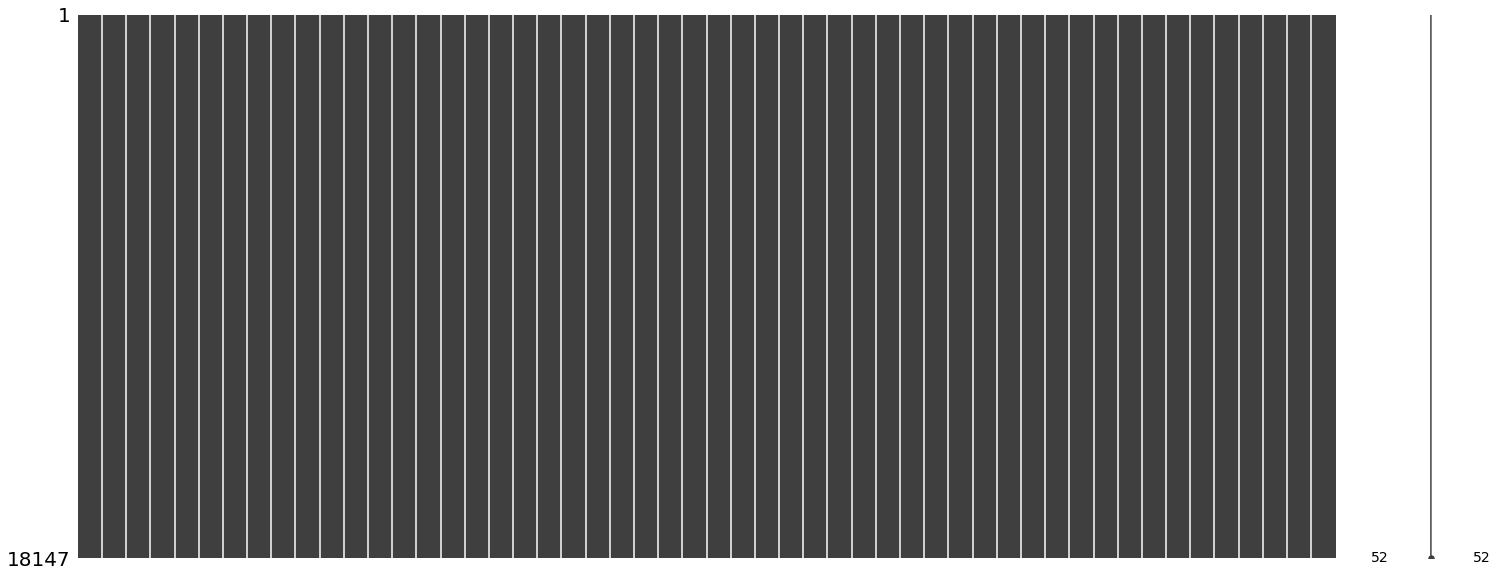

In [34]:
ms.matrix(dataSubset)

# Clean Data!

In [35]:
#Convert Weight to numeric
dataSubset['Weight'] = pd.to_numeric(dataSubset['Weight'])
dataSubset['Release Clause'] = pd.to_numeric(dataSubset['Release Clause'])

/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
dataSubset.dtypes

ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Position                     object
Height                      float64
Weight                        int64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   

In [37]:
#Label Encode features like Preferred Foot, Position, Attack/Defense Work Rate:
le = LabelEncoder()
dataSubset['Preferred Foot'] = le.fit_transform(dataSubset['Preferred Foot'])
le = LabelEncoder()
dataSubset['Position'] = le.fit_transform(dataSubset['Position'])
leAttack = LabelEncoder()
dataSubset['Attack Work Rate'] = leAttack.fit_transform(dataSubset['Attack Work Rate'])
leDefense = LabelEncoder()
dataSubset['Defense Work Rate'] = leDefense.fit_transform(dataSubset['Defense Work Rate'])

/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/echhitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [38]:
dataSubset.dtypes

ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot                int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Position                      int64
Height                      float64
Weight                        int64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   

# Ready to model:

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Setting the number of clusters as 11. 1 for each postion in a team**

In [40]:
k = 11

In [41]:
dataSubset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,31,94,94,110500000.00,565000.00,2202,0,5.00,4.00,4.00,21,169.76,159,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,2,2,0.00
1,20801,33,94,94,77000000.00,405000.00,2228,1,5.00,4.00,5.00,26,187.84,183,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,0,1,0.00
2,190871,26,92,93,118500000.00,290000.00,2143,1,5.00,5.00,5.00,14,174.72,150,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,0,2,0.00
3,193080,27,91,93,72000000.00,260000.00,1471,1,4.00,3.00,1.00,5,192.80,168,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,2,2,0.00
4,192985,27,91,92,102000000.00,355000.00,2281,1,4.00,5.00,4.00,19,179.68,154,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,0,0,0.00


In [42]:
#Lets first Scale the dataset:
sc = StandardScaler()
#Remove variables that dont make sense scaling:
nonScaleList = ['ID','Position']
dataSubsetScaled = dataSubset.drop(columns = nonScaleList)
dataSubsetScaled = pd.DataFrame(sc.fit_transform(dataSubsetScaled),columns = dataSubsetScaled.columns)

In [43]:
dataSubsetScaled.head()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,1.26,4.01,3.70,19.29,25.20,2.21,-1.82,9.86,1.59,2.17,-1.63,-0.45,1.87,2.53,1.02,2.13,2.43,2.20,2.49,2.93,2.24,2.26,1.77,1.45,1.86,3.68,2.20,1.71,0.25,0.55,-0.50,2.43,-0.45,-1.19,2.25,2.87,1.68,3.27,-0.72,-0.91,-0.92,-0.60,-0.32,-0.07,-0.14,-0.49,20.73,0.67,0.56,-3.10
1,1.69,4.01,3.70,13.31,17.94,2.31,0.55,9.86,1.59,3.49,1.01,1.09,1.87,2.48,2.11,1.52,2.49,1.73,1.84,1.90,1.58,2.14,1.63,1.79,1.59,3.79,0.43,2.29,2.53,1.56,1.09,2.38,0.41,-0.86,2.31,2.02,2.32,3.18,-0.97,-0.77,-1.06,-0.54,-0.32,-0.07,-0.14,-0.32,11.46,-1.60,-0.74,-3.10
2,0.19,3.72,3.53,20.72,12.72,2.00,0.55,9.86,3.11,3.49,-0.90,-1.03,1.59,2.12,0.56,1.72,2.32,2.15,2.22,2.52,1.65,2.20,1.97,1.73,2.20,3.57,1.42,1.42,-0.35,1.12,-1.30,1.81,0.01,-0.52,2.00,2.37,2.07,3.09,-1.02,-1.09,-0.60,-0.43,-0.44,-0.07,-0.08,-0.32,20.88,-1.60,0.56,-3.10
3,0.40,3.58,3.53,12.42,11.36,-0.47,0.55,7.32,0.08,-1.80,1.73,0.13,-1.78,-1.67,-1.80,-0.59,-1.69,-1.98,-1.42,-1.37,-0.11,-0.98,-0.51,-0.46,-0.24,3.13,-1.48,-1.42,0.16,-1.27,-0.11,-1.82,-1.03,-0.81,-1.94,1.03,-0.54,0.82,-1.62,-1.23,-1.53,4.15,4.06,4.29,4.20,4.30,12.53,0.67,0.56,-3.10
4,0.40,3.58,3.37,17.77,15.67,2.50,0.55,7.32,3.11,2.17,-0.18,-0.77,2.36,1.87,0.16,2.27,2.21,1.62,2.06,2.30,2.50,1.96,0.90,0.77,1.05,3.24,0.92,2.06,-0.18,1.68,0.77,2.28,1.16,0.69,1.90,2.87,1.94,2.57,1.04,0.48,0.25,-0.09,-0.20,-0.68,-0.38,-0.21,17.92,-1.60,-2.04,-3.10


In [44]:
#Concatenate the remaining features:
dataSubsetScaled = pd.concat([dataSubsetScaled,dataSubset[['ID','Position']]],axis = 1)

In [45]:
#There are nulls for some reason, will drop them
dataSubsetScaled.dropna(axis=0,inplace= True)

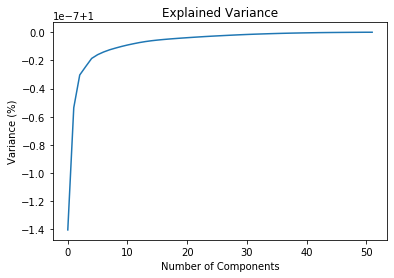

In [46]:
#Find optimal PCA components:
pca = PCA().fit(dataSubsetScaled)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [47]:
#Lets apply PCA:
pca = PCA(n_components = 10).fit(dataSubsetScaled)
dataSubsetScaled = pd.DataFrame(pca.transform(dataSubsetScaled))


In [48]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataSubsetScaled)
output = kmeans.transform(dataSubsetScaled)

In [50]:
clusters = pd.Series(kmeans.labels_,name = "Cluster")

In [51]:
dataSubset = pd.concat([dataSubset,clusters],axis = 1)

In [52]:
dataSubset.head(20)

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class,Cluster
0,158023.00,31.00,94.00,94.00,110500000.00,565000.00,2202.00,0.00,5.00,4.00,4.00,21.00,169.76,159.00,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,2.00,2.00,0.00,0.00
1,20801.00,33.00,94.00,94.00,77000000.00,405000.00,2228.00,1.00,5.00,4.00,5.00,26.00,187.84,183.00,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,0.00,1.00,0.00,3.00
2,190871.00,26.00,92.00,93.00,118500000.00,290000.00,2143.00,1.00,5.00,5.00,5.00,14.00,174.72,150.00,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,0.00,2.00,0.00,1.00
3,193080.00,27.00,91.00,93.00,72000000.00,260000.00,1471.00,1.00,4.00,3.00,1.00,5.00,192.80,168.00,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,2.00,2.00,0.00,1.00
4,192985.00,27.00,91.00,92.00,102000000.00,355000.00,2281.00,1.00,4.00,5.00,4.00,19.00,179.68,154.00,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,0.00,0.00,0.00,1.00
5,183277.00,27.00,91.00,91.00,93000000.00,340000.00,2142.00,1.00,4.00,4.00,4.00,11.00,172.24,163.00,81.00,84.00,61.00,89.00,80.00,95.00,83.00,79.00,83.00,94.00,94.00,88.00,95.00,90.00,94.00,82.00,56.00,83.00,66.00,80.00,54.00,41.00,87.00,89.00,86.00,91.00,34.00,27.00,22.00,11.00,12.00,6.00,8.00,8.00,172100000.00,0.00,2.00,0.00,0.00
6,177003.00,32.00,91.00,91.00,67000000.00,420000.00,2280.00,1.00,4.00,4.00,4.00,19.00,172.24,146.00,86.00,72.00,55.00,93.00,76.00,90.00,85.00,78.00,88.00,93.00,80.00,72.00,93.00,90.00,94.00,79.00,68.00,89.00,58.00,82.00,62.00,83.00,79.00,92.00,82.00,84.00,60.00,76.00,73.00,13.00,9.00,7.00,14.00,9.00,137400000.00,0.00,0.00,0.00,0.00
7,176580.00,31.00,91.00,91.00,80000000.00,455000.00,2346.00,1.00,5.00,4.00,3.00,23.00,182.88,190.00,77.00,93.00,77.00,82.00,88.00,87.00,86.00,84.00,64.00,90.00,86.00,75.00,82.00,92.00,83.00,86.00,69.00,90.00,83.00,85.00,87.00,41.00,92.00,84.00,85.00,85.00,62.00,45.00,38.00,27.00,25.00,31.00,33.00,37.00,164000000.00,0.00,2.00,0.00,0.00
8,155862.00,32.00,91.00,91.00,51000000.00,380000.00,2201.00,1.00,4.00,3.00,3.00,18.00,182.88,181.00,66.00,60.00,91.00,78.00,66.00,63.00,74.00,72.00,77.00,84.00,76.00,75.00,78.00,85.00,66.00,79.00,93.00,84.00,83.00,59.00,88.00,90.00,60.00,63.00,75.00,82.00,87.00,92.00,91.00,11.00,8.00,9.00,7.00,11.00,104600000.00,0.00,2.00,0.00,0.00
9,200389.00,25.00,90.00,93.00,68000000.00,94000.00,1331.00,1.00,3.00,3.00,1.00,5.00,187.84,192.00,13.00,11.00,15.00,29.00,13.00,12.00,13.00,14.00,26.00,16.00,43.00,60.00,67.00,86.00,49.00,22.00,76.00,41.00,78.00,12.00,34.00,19.00,11.00,70.00,11.00,70.00,27.00,12.00,18.00,86.00,92.00,78.00,88.00,89.00,144500000.00,2.00,2.00,0.00,1.00


In [53]:
dataSubset.Cluster.value_counts()

2.00    9590
1.00    6062
0.00    2264
3.00     171
Name: Cluster, dtype: int64

In [54]:
data.shape

(18207, 81)

In [55]:
clusters.shape

(18087,)

In [56]:
data.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.00,565000.00,2202,Left,5.00,4.00,4.00,RF,169.76,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,187.84,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.00,290000.00,2143,Right,5.00,5.00,5.00,LW,174.72,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,0.00
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.00,260000.00,1471,Right,4.00,3.00,1.00,GK,192.80,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,0.00
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.00,355000.00,2281,Right,4.00,5.00,4.00,RCM,179.68,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,0.00
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.00,340000.00,2142,Right,4.00,4.00,4.00,LF,172.24,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.00,84.00,61.00,89.00,80.00,95.00,83.00,79.00,83.00,94.00,94.00,88.00,95.00,90.00,94.00,82.00,56.00,83.00,66.00,80.00,54.00,41.00,87.00,89.00,86.00,91.00,34.00,27.00,22.00,11.00,12.00,6.00,8.00,8.00,172100000.00,High,Medium,0.00
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.00,420000.00,2280,Right,4.00,4.00,4.00,RCM,172.24,146,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.00,72.00,55.00,93.00,76.00,90.00,85.00,78.00,88.00,93.00,80.00,72.00,93.00,90.00,94.00,79.00,68.00,89.00,58.00,82.00,62.00,83.00,79.00,92.00,82.00,84.00,60.00,76.00,73.00,13.00,9.00,7.00,14.00,9.00,137400000.00,High,High,0.00
7,176580,L. Suárez,31,Uruguay,91,91,FC Barce

In [57]:
#Join names to clustered data:
finalData = pd.DataFrame()
finalData = dataSubset.merge(data[['ID','Name','Position']],how='left',on='ID')

In [58]:
finalData.loc[(finalData['Cluster']==2) & (finalData['Position_y']=='RB')]

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position_x,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class,Cluster,Name,Position_y
324,227928.00,24.00,81.00,86.00,20000000.00,125000.00,2039.00,1.00,2.00,3.00,4.00,17.00,177.20,148.00,74.00,50.00,58.00,73.00,42.00,80.00,61.00,30.00,65.00,78.00,91.00,92.00,88.00,82.00,83.00,74.00,80.00,91.00,62.00,60.00,77.00,80.00,72.00,62.00,38.00,75.00,75.00,78.00,79.00,16.00,12.00,10.00,14.00,12.00,42500000.00,2.00,0.00,0.00,2.00,Nélson Semedo,RB
417,234035.00,22.00,80.00,88.00,18500000.00,115000.00,1991.00,1.00,1.00,3.00,3.00,17.00,174.72,146.00,81.00,45.00,73.00,77.00,48.00,69.00,69.00,30.00,70.00,77.00,80.00,82.00,78.00,77.00,79.00,58.00,71.00,80.00,63.00,59.00,63.00,75.00,68.00,63.00,62.00,69.00,83.00,79.00,80.00,11.00,12.00,10.00,5.00,14.00,41600000.00,0.00,2.00,0.00,2.00,Odriozola,RB
424,226851.00,22.00,80.00,86.00,17500000.00,33000.00,1965.00,1.00,1.00,3.00,3.00,17.00,185.36,168.00,66.00,37.00,73.00,78.00,57.00,66.00,58.00,51.00,80.00,77.00,69.00,73.00,68.00,77.00,66.00,60.00,86.00,77.00,74.00,48.00,72.00,84.00,54.00,66.00,51.00,79.00,83.00,80.00,81.00,9.00,7.00,15.00,7.00,15.00,33300000.00,2.00,2.00,0.00,2.00,B. Pavard,RB
567,230201.00,34.00,79.00,79.00,3600000.00,38000.00,1953.00,1.00,1.00,3.00,3.00,17.00,177.20,165.00,81.00,48.00,69.00,73.00,49.00,78.00,55.00,49.00,75.00,77.00,83.00,76.00,82.00,81.00,75.00,52.00,51.00,85.00,62.00,56.00,62.00,77.00,57.00,61.00,41.00,54.00,79.00,78.00,76.00,15.00,13.00,12.00,10.00,15.00,6800000.00,0.00,2.00,1.00,2.00,Maikel Catarino,RB
735,231281.00,19.00,78.00,88.00,14000000.00,36000.00,2025.00,1.00,1.00,3.00,3.00,17.00,179.68,152.00,83.00,56.00,59.00,76.00,41.00,72.00,74.00,74.00,75.00,72.00,82.00,79.00,74.00,75.00,74.00,70.00,66.00,79.00,62.00,63.00,73.00,76.00,62.00,72.00,55.00,74.00,75.00,76.00,74.00,14.00,15.00,14.00,6.00,7.00,29400000.00,0.00,2.00,1.00,2.00,T. Alexander-Arnold,RB
738,230360.00,30.00,78.00,78.00,7500000.00,29000.00,2075.00,1.00,1.00,3.00,4.00,17.00,174.72,165.00,76.00,69.00,60.00,76.00,71.00,76.00,76.00,68.00,59.00,75.00,84.00,76.00,79.00,80.00,70.00,72.00,61.00,88.00,68.00,74.00,73.00,72.00,76.00,64.00,64.00,80.00,78.00,75.00,77.00,7.00,8.00,8.00,8.00,7.00,13500000.00,2.00,2.00,1.00,2.00,Everticinho,RB
744,228881.00,21.00,78.00,88.00,14500000.00,52000.00,1946.00,1.00,1.00,3.00,3.00,17.00,174.72,154.00,79.00,30.00,64.00,75.00,58.00,73.00,76.00,48.00,68.00,74.00,81.00,77.00,83.00,74.00,78.00,62.00,69.00,81.00,64.00,48.00,78.00,77.00,42.00,50.00,48.00,74.00,78.00,78.00,77.00,8.00,14.00,15.00,12.00,7.00,27600000.00,2.00,2.00,1.00,2.00,D. Calabria,RB
1036,226166.00,20.00,77.00,86.00,12000000.00,30000.00,1906.00,1.00,1.00,3.00,3.00,17.00,185.36,163.00,74.00,30.00,69.00,74.00,35.00,72.00,68.00,33.00,67.00,73.00,78.00,84.00,69.00,69.00,64.00,57.00,86.00,69.00,79.00,52.00,72.00,76.00,59.00,60.00,45.00,71.00,75.00,79.00,81.00,10.00,7.00,14.00,11.00,15.00,22800000.00,0.00,0.00,1.00,2.00,N. Mukiele,RB
1107,226229.00,21.00,77.00,84.00,11000000.00,43000.00,1806.00,0.00,1.00,5.00,3.00,17.00,185.36,168.00,56.00,37.00,76.00,63.00,32.00,63.00,45.00,38.00,58.00,64.00,74.00,76.00,69.00,76.00,65.00,65.00,78.00,74.00,70.00,40.00,80.00,75.00,48.00,56.00,36.00,68.00,72.00,81.00,85.00,9.00,9.00,14.00,10.00,12.00,22600000.00,2.00,0.00,1.00,2.00,T. Kehrer,RB
1282,230197.00,30.00,76.00,76.00,5500000.00,25000.00,1920.00,1.00,1.00,3.00,3.00,17.00,174.72,157.00,72.00,51.00,66.00,77.00,39.00,77.00,51.00,52.00,74.00,71.00,74.00,77.00,81.00,75.00,72.00,34.00,65.00,80.00,61.00,51.00,81.00,71.00,55.00,56.00,66.00,73.00,77.00,76.00,

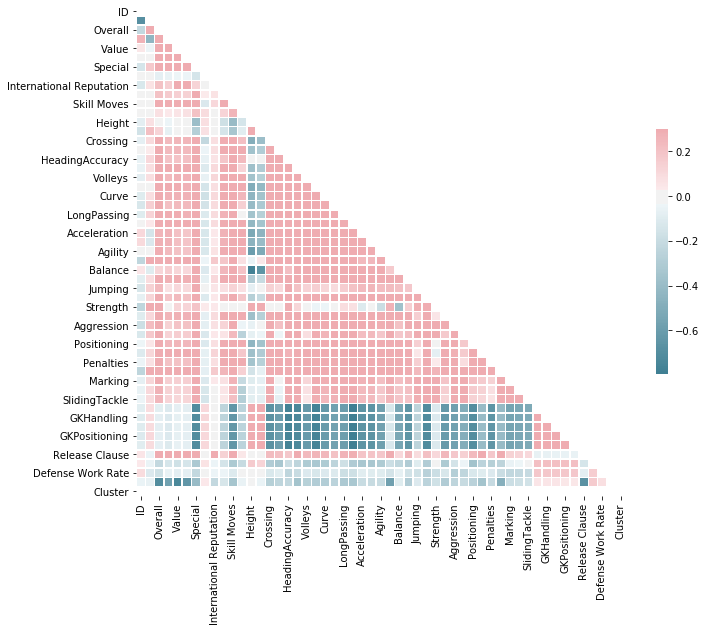

In [59]:
import seaborn as sns
corr = finalData.loc[finalData['Cluster']==2].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
playerData = pd.DataFrame(playerDict)

In [61]:
playerData.head()

,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389,188545,182521,182493,168542,215914,211110,202126,194765,192448,192119,189511,179813,167495,153079,138956,231747,209331,200145,198710,198219,197781,190460,189242,188567,178603,176676,173731,167948,167664,164240,162835,1179,205600,201399,201024,195864,193041,192505,192387,189332,...,246600,244810,244561,244817,244631,243866,242852,243876,245412,243621,243112,245417,246446,246447,237746,243636,238520,243900,243649,246227,238550,243158,246243,221669,245734,246001,53748,241657,243961,240917,240158,240927,240160,245569,245570,245571,244823,245862,243582,238477,246167,242844,244677,231381,243413,238813,243165,241638,246268,246269
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,R. Lewandowski,T. Kroos,D. Godín,David Silva,N. Kanté,P. Dybala,H. Kane,A. Griezmann,M. ter Stegen,T. Courtois,Sergio Busquets,E. Cavani,M. Neuer,S. Agüero,G. Chiellini,K. Mbappé,M. Salah,Casemiro,J. Rodríguez,L. Insigne,Isco,C. Eriksen,Coutinho,P. Aubameyang,M. Hummels,Marcelo,G. Bale,H. Lloris,G. Higuaín,Thiago Silva,S. Handanovič,G. Buffon,S. Umtiti,M. Icardi,K. Koulibaly,P. Pogba,K. Navas,R. Lukaku,C. Immobile,Jordi Alba,...,K. Taylor,T. Lawal,L. Jagne,D. Szczepaniak,P. Wieliczko,T. Gundelund,Wang Xin,M. Frøkjær-Jensen,H. Norris,N. Ayéva,Wu Lei,J. Manley,T. Pugh,Nicolas Firmino,Y. Uchimura,C. Hawkins,R. Takae,S. Adewusi,E. Clarke,T. Hillman,R. Roache,L. Wahlstedt,J. Williams,M. Hurst,C. Maher,Y. Góez,K. Pilkington,D. Horton,E. Tweed,Zhang Yufeng,C. Ehlich,L. Collins,A. Kaltner,L. Watkins,J. Norville-Williams,S. Squire,N. Fuentes,J. Milli,S. Griffin,K. Fujikawa,D. Holland,J. Livesey,M. Baldisimo,J. Young,D. Walsh,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
1,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City,Chelsea,Real Madrid,FC Barcelona,Real Madrid,Atlético Madrid,FC Bayern München,Real Madrid,Atlético Madrid,Manchester City,Chelsea,Juventus,Tottenham Hotspur,Atlético Madrid,FC Barcelona,Real Madrid,FC Barcelona,Paris Saint-Germain,FC Bayern München,Manchester City,Juventus,Paris Saint-Germain,Liverpool,Real Madrid,FC Bayern München,Napoli,Real Madrid,Tottenham Hotspur,FC Barcelona,Arsenal,FC Bayern München,Real Madrid,Real Madrid,Tottenham Hotspur,Milan,Paris Saint-Germain,Inter,Paris Saint-Germain,FC Barcelona,Inter,Napoli,Manchester United,Real Madrid,Manchester United,Lazio,FC Barcelona,...,Shrewsbury,LASK Linz,Morecambe,Morecambe,Wisła Płock,Vejle Boldklub,Guangzhou R&F; FC,Odense Boldklub,Oldham Athletic,Örebro SK,Tianjin Quanjian FC,St. Patrick's Athletic,Scunthorpe United,New England Revolution,Hokkaido Consadole Sapporo,Burton Albion,Gamba Osaka,Carlisle United,Fleetwood Town,Newport County,Blackpool,Dalkurd FF,Northampton Town,St. Johnstone FC,Bray Wanderers,Atlético Nacional,Cambridge United,Lincoln City,Derry City,Beijing Renhe FC,SpVgg Unterhaching,Newport County,SpVgg Unterhaching,Cambridge United,Cambridge United,Cambridge United,Unión Española,Lecce,Waterford FC,Júbilo Iwata,Cork City,Burton Albion,Vancouver Whitecaps FC,Swindon Town,Waterford FC,Crewe Alexandra,Trelleborgs FF,Cambridge United,Tranmere Rovers,Tranmere Rovers
2,Argentina,Portugal,Brazil,Spain,Belgium,Belgium,Croatia,Uruguay,Spain,Slovenia,Poland,Germany,Uruguay,Spain,France,Argentina,England,France,Germany,Belgium,Spain,Uruguay,Germany,Argentina,Italy,France,Egypt,Brazil,Colombia,Italy,Spain,Denmark,Brazil,Gabon,Germany,Brazil,Wales,France,Argentina,Brazil,Slovenia,Italy,France,Argentina,Senegal,France,Costa Rica,Belgium,Italy,Spain,...,England,Austria,England,Poland,Poland,Denmark,China PR,Denmark,England,Sweden,China PR,Republic of Ireland,England,Brazil,Japan,England,Japan,Nigeria,England,Wales,Republic of Ireland,Sweden,England,Scotland,Republic of Ireland,Colombia,England,England,Republic of Ireland,China PR,Germany,Wales,Germany,England,England,England,Chile,Italy,Republic of Ireland,Japan

In [62]:
playerData = playerData.T

In [63]:
playerData.rename(columns={0:"Name",1:"Club",2:"Nationality",3:"Position",4:"Preferred Foot"},inplace=True)

In [64]:
playerData.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Preferred Foot'], dtype='object')

In [65]:
playerData.reset_index(inplace=True)
playerData.rename(columns = {"index":"ID"},inplace=True)

In [66]:
playerData.head()

,ID,Name,Club,Nationality,Position,Preferred Foot
0,158023,L. Messi,FC Barcelona,Argentina,RF,Left
1,20801,Cristiano Ronaldo,Juventus,Portugal,ST,Right
2,190871,Neymar Jr,Paris Saint-Germain,Brazil,LW,Right
3,193080,De Gea,Manchester United,Spain,GK,Right
4,192985,K. De Bruyne,Manchester City,Belgium,RCM,Right


In [67]:
playerData.ID=pd.to_numeric(playerData.ID)

In [68]:
finalData.ID.dtype

dtype('float64')

In [69]:
#Add the PlayerDict items to the clustered Dataset
finalData = playerData.merge(finalData,left_on="ID",right_on="ID")

In [70]:
#Little more housekeeping:
dropFinalList = ['Preferred Foot_y','Position_x','Name_y',"Position_y","class"]
finalData.drop(columns = dropFinalList,inplace=True)
finalData.rename(columns={"Name_x":"Name","Preferred Foot_x":"Preferred Foot"},inplace=True)

In [71]:
finalData.loc[finalData['Defense Work Rate']==1].head(1)

,ID,Name,Club,Nationality,Position,Preferred Foot,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,Cluster
1,20801,Cristiano Ronaldo,Juventus,Portugal,ST,Right,33.00,94.00,94.00,77000000.00,405000.00,2228.00,5.00,4.00,5.00,187.84,183.00,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,0.00,1.00,3.00


In [72]:
data.loc[data['ID']==20801]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,class
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.00,405000.00,2228,Right,5.00,4.00,5.00,ST,187.84,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,0.00


In [73]:
#Recode the Attack/Defense Work Rate:
finalData['Attack Work Rate'] = finalData['Attack Work Rate'].apply(lambda x: "High" if x==0 else("Low" if x==1 else "Medium"))

finalData['Defense Work Rate'] = finalData['Defense Work Rate'].apply(lambda x: "High" if x==0 else("Low" if x==1 else "Medium"))





In [74]:
finalData.head()

,ID,Name,Club,Nationality,Position,Preferred Foot,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,Cluster
0,158023,L. Messi,FC Barcelona,Argentina,RF,Left,31.00,94.00,94.00,110500000.00,565000.00,2202.00,5.00,4.00,4.00,169.76,159.00,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,Juventus,Portugal,ST,Right,33.00,94.00,94.00,77000000.00,405000.00,2228.00,5.00,4.00,5.00,187.84,183.00,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,3.00
2,190871,Neymar Jr,Paris Saint-Germain,Brazil,LW,Right,26.00,92.00,93.00,118500000.00,290000.00,2143.00,5.00,5.00,5.00,174.72,150.00,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,1.00
3,193080,De Gea,Manchester United,Spain,GK,Right,27.00,91.00,93.00,72000000.00,260000.00,1471.00,4.00,3.00,1.00,192.80,168.00,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,1.00
4,192985,K. De Bruyne,Manchester City,Belgium,RCM,Right,27.00,91.00,92.00,102000000.00,355000.00,2281.00,4.00,5.00,4.00,179.68,154.00,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,1.00


In [75]:
print(list(finalData['Cluster'].value_counts().index))

[2.0, 1.0, 0.0, 3.0]


In [76]:
finalData['Nationality'] = finalData['Nationality'].apply(lambda x: "China" if x == 'China PR' else x)
finalData['Nationality'] = finalData['Nationality'].apply(lambda x: "Macedonia" if x == 'FYR Macedonia' else x)
finalData['Nationality'] = finalData['Nationality'].apply(lambda x: "South Korea" if x == 'Korea Republic' else x)
finalData['Nationality'] = finalData['Nationality'].apply(lambda x: "United Kingdom" if ((x == 'England') or (x == 'Wales') or(x == 'Scotland') or (x == 'Northern Ireland')) else x)



In [77]:
# #Conver countries that Tableau does not understand
# col = 'Nationality'
# conditionCountry = [finalData[col]=="China PR", finalData[col]=="FYR Macedonia", finalData[col]=="Korea Republic",
#                     (finalData[col].any()=="Northern Ireland") or (finalData[col].any()=="Wales") or (finalData[col].any()=="Scotland") 
#                     or (finalData[col].any()=="England")]
# output = ['China','Macedonia','South Korea','United Kingdom']
# finalData['Nationality'] = pd.DataFrame(np.select(conditionCountry,output,default))

In [78]:
finalData.head()

,ID,Name,Club,Nationality,Position,Preferred Foot,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,Cluster
0,158023,L. Messi,FC Barcelona,Argentina,RF,Left,31.00,94.00,94.00,110500000.00,565000.00,2202.00,5.00,4.00,4.00,169.76,159.00,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,91.00,86.00,91.00,95.00,95.00,85.00,68.00,72.00,59.00,94.00,48.00,22.00,94.00,94.00,75.00,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,226500000.00,Medium,Medium,0.00
1,20801,Cristiano Ronaldo,Juventus,Portugal,ST,Right,33.00,94.00,94.00,77000000.00,405000.00,2228.00,5.00,4.00,5.00,187.84,183.00,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,89.00,91.00,87.00,96.00,70.00,95.00,95.00,88.00,79.00,93.00,63.00,29.00,95.00,82.00,85.00,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,127100000.00,High,Low,3.00
2,190871,Neymar Jr,Paris Saint-Germain,Brazil,LW,Right,26.00,92.00,93.00,118500000.00,290000.00,2143.00,5.00,5.00,5.00,174.72,150.00,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,94.00,90.00,96.00,94.00,84.00,80.00,61.00,81.00,49.00,82.00,56.00,36.00,89.00,87.00,81.00,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,228100000.00,High,Medium,1.00
3,193080,De Gea,Manchester United,Spain,GK,Right,27.00,91.00,93.00,72000000.00,260000.00,1471.00,4.00,3.00,1.00,192.80,168.00,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,57.00,58.00,60.00,90.00,43.00,31.00,67.00,43.00,64.00,12.00,38.00,30.00,12.00,68.00,40.00,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,138600000.00,Medium,Medium,1.00
4,192985,K. De Bruyne,Manchester City,Belgium,RCM,Right,27.00,91.00,92.00,102000000.00,355000.00,2281.00,4.00,5.00,4.00,179.68,154.00,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,78.00,76.00,79.00,91.00,77.00,91.00,63.00,90.00,75.00,91.00,76.00,61.00,87.00,94.00,79.00,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,196400000.00,High,High,1.00


In [81]:
finalData.loc[finalData['Nationality']== "United Kingdom"]

,ID,Name,Club,Nationality,Position,Preferred Foot,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate,Cluster
16,202126,H. Kane,Tottenham Hotspur,United Kingdom,ST,Right,24.00,89.00,91.00,83500000.00,205000.00,2165.00,3.00,4.00,3.00,187.84,196.00,75.00,94.00,85.00,80.00,84.00,80.00,78.00,68.00,82.00,84.00,68.00,72.00,71.00,91.00,71.00,88.00,78.00,89.00,84.00,85.00,76.00,35.00,93.00,80.00,90.00,89.00,56.00,36.00,38.00,8.00,10.00,11.00,14.00,11.00,160700000.00,High,High,1.00
36,173731,G. Bale,Real Madrid,United Kingdom,ST,Left,28.00,88.00,88.00,60000000.00,355000.00,2279.00,4.00,3.00,4.00,185.36,181.00,87.00,86.00,84.00,85.00,85.00,87.00,90.00,87.00,80.00,85.00,94.00,95.00,82.00,85.00,65.00,92.00,87.00,75.00,80.00,91.00,65.00,59.00,85.00,79.00,76.00,86.00,54.00,55.00,52.00,15.00,15.00,11.00,5.00,6.00,123000000.00,High,Medium,0.00
60,202652,R. Sterling,Manchester City,United Kingdom,RW,Right,23.00,86.00,89.00,56500000.00,195000.00,2036.00,3.00,3.00,4.00,169.76,152.00,77.00,77.00,38.00,84.00,67.00,88.00,70.00,63.00,69.00,87.00,95.00,92.00,93.00,87.00,93.00,73.00,57.00,78.00,52.00,73.00,38.00,30.00,87.00,77.00,69.00,77.00,47.00,58.00,54.00,15.00,12.00,12.00,15.00,9.00,108800000.00,High,Medium,1.00
117,211117,D. Alli,Tottenham Hotspur,United Kingdom,LCM,Right,22.00,84.00,90.00,42500000.00,115000.00,2189.00,3.00,3.00,4.00,187.84,176.00,69.00,83.00,77.00,85.00,79.00,83.00,75.00,68.00,80.00,85.00,73.00,76.00,76.00,85.00,62.00,78.00,67.00,90.00,71.00,80.00,84.00,74.00,86.00,85.00,74.00,86.00,70.00,70.00,63.00,7.00,6.00,9.00,11.00,8.00,87100000.00,High,High,1.00
135,188377,K. Walker,Manchester City,United Kingdom,RB,Right,28.00,84.00,84.00,24500000.00,165000.00,2175.00,3.00,2.00,2.00,182.88,154.00,81.00,51.00,74.00,78.00,57.00,79.00,76.00,71.00,67.00,78.00,86.00,93.00,67.00,83.00,72.00,86.00,83.00,89.00,75.00,69.00,78.00,81.00,67.00,69.00,63.00,75.00,78.00,84.00,83.00,12.00,6.00,16.00,15.00,8.00,45300000.00,High,High,1.00
180,204935,J. Pickford,Everton,United Kingdom,GK,Left,24.00,83.00,88.00,25000000.00,78000.00,1435.00,1.00,4.00,1.00,185.36,170.00,17.00,19.00,15.00,55.00,20.00,14.00,18.00,16.00,55.00,40.00,53.00,44.00,55.00,83.00,55.00,31.00,72.00,45.00,70.00,13.00,30.00,24.00,18.00,68.00,41.00,69.00,16.00,20.00,12.00,83.00,78.00,88.00,81.00,86.00,49400000.00,Medium,Medium,1.00
182,203574,J. Stones,Manchester City,United Kingdom,RCB,Right,24.00,83.00,87.00,28500000.00,125000.00,1858.00,2.00,4.00,3.00,187.84,154.00,62.00,29.00,83.00,81.00,27.00,69.00,47.00,29.00,74.00,80.00,67.00,71.00,61.00,82.00,59.00,46.00,75.00,79.00,77.00,38.00,79.00,81.00,48.00,67.00,44.00,80.00,85.00,85.00,82.00,7.00,15.00,11.00,10.00,8.00,54900000.00,High,Medium,1.00
241,216267,A. Robertson,Liverpool,United Kingdom,LB,Left,24.00,82.00,87.00,24500000.00,98000.00,2023.00,1.00,2.00,3.00,177.20,141.00,86.00,57.00,63.00,76.00,32.00,76.00,74.00,30.00,68.00,78.00,81.00,86.00,78.00,81.00,74.00,67.00,59.00,89.00,66.00,60.00,78.00,80.00,66.00,74.00,55.00,73.00,80.00,81.00,78.00,11.00,8.00,10.00,7.00,14.00,48400000.00,High,High,1.00
251,208830,J. Vardy,Leicester City,United Kingdom,ST,Right,31.00,82.00,82.00,20000000.00,96000.00,2082.00,3.00,3.00,3.00,177.20,163.00,64.00,85.00,69.00,65.00,82.00,76.00,60.00,57.00,48.00,76.00,89.00,91.00,75.00,88.00,76.00,85.00,76.00,86.00,67.00,67.00,92.00,49.00,85.00,72.00,81.00,82.00,56.00,52.00,51.00,15.00,14.00,7.00,15.00,11.00,38000000.00,High,High,1.00
254,207494,J. Lingard,Manchester United,United Kingdom,CAM,Right,25.00,82.00,83.00,26500000.00,140000.00,2095.00,2.00,3.00,4.00,174.72

In [82]:
#Now finally divide the clusters and save them as separate csv files
for i in list(finalData['Cluster'].value_counts().index):
    finalData.loc[finalData['Cluster']== i ].to_csv(r"PlayerDataCluster"+str(int(i))+".csv")